In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import x_sin, generate_data

In [14]:
LOG_DIR = './ops_logs/x_sin'
TIMESTEPS = 10
RNN_LAYERS = [{'num_units': 10}, {'num_units':5}] # can't reduce it to 1 or it'll fail
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100
LEARNING_RATE = 0.1

In [10]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

In [11]:
print(X['train'].shape)
print(y['train'].shape)

(8090, 10, 1)
(8090, 1)


In [12]:
#validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], 
#                                                      every_n_steps=PRINT_STEPS, 
#                                                      early_stopping_rounds=1000)
regressor = tf.contrib.learn.SKCompat(tf.contrib.learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR))
#regressor = tf.estimator.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
#                                  model_dir=LOG_DIR) # doesn't work?

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7cd013d668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './ops_logs/x_sin'}


In [13]:
regressor.fit(X['train'], y['train'],
              #monitors=[validation_monitor],
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'report_uninitialized_variables_1/boolean_mask/Gather:0' shape=(?,) dtype=string>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/remote/us01home29/yuwang/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/remote/us01home29/yuwang/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/remote/us01home29/yuwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.la

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/x_sin/model.ckpt-310000
INFO:tensorflow:Saving checkpoints for 310001 into ./ops_logs/x_sin/model.ckpt.
INFO:tensorflow:loss = 0.000290712, step = 310001
INFO:tensorflow:global_step/sec: 264.038
INFO:tensorflow:loss = 0.000831464, step = 310101 (0.380 sec)
INFO:tensorflow:global_step/sec: 316.099
INFO:tensorflow:loss = 0.00437606, step = 310201 (0.316 sec)
INFO:tensorflow:global_step/sec: 311.198
INFO:tensorflow:loss = 0.000318643, step = 310301 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.243
INFO:tensorflow:loss = 0.00142468, step = 310401 (0.319 sec)
INFO:tensorflow:global_step/sec: 224.885
INFO:tensorflow:loss = 0.000557978, step = 310501 (0.445 sec)
INFO:tensorflow:global_step/sec: 284.559
INFO:tensorflow:loss = 0.00688564, step = 310601 (0.352 sec)
INFO:tensorflow:global_step/sec: 299.222
INFO:tensorflow:loss = 0.00205344, step = 310701 (0.334 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 312.477
INFO:tensorflow:loss = 0.011305, step = 317901 (0.320 sec)
INFO:tensorflow:global_step/sec: 375.521
INFO:tensorflow:loss = 0.011095, step = 318001 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.031
INFO:tensorflow:loss = 0.00123741, step = 318101 (0.264 sec)
INFO:tensorflow:global_step/sec: 380.545
INFO:tensorflow:loss = 0.00982896, step = 318201 (0.263 sec)
INFO:tensorflow:global_step/sec: 378.974
INFO:tensorflow:loss = 0.00941525, step = 318301 (0.264 sec)
INFO:tensorflow:global_step/sec: 380.035
INFO:tensorflow:loss = 0.00743245, step = 318401 (0.263 sec)
INFO:tensorflow:global_step/sec: 378.727
INFO:tensorflow:loss = 0.000369936, step = 318501 (0.264 sec)
INFO:tensorflow:global_step/sec: 368.96
INFO:tensorflow:loss = 0.000897616, step = 318601 (0.271 sec)
INFO:tensorflow:global_step/sec: 379.787
INFO:tensorflow:loss = 0.00133909, step = 318701 (0.263 sec)
INFO:tensorflow:global_step/sec: 377.103
INFO:tensorflow:loss = 0.000456885, step = 3

SKCompat()

In [15]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/x_sin/model.ckpt-320000
MSE: 63.772095


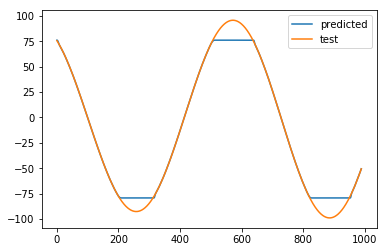

In [16]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/x_sin/model.ckpt-320000


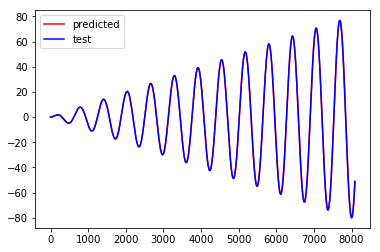

In [17]:
plot_predicted, = plt.plot(regressor.predict(X['train']), label='predicted', color="red")
plot_test, = plt.plot(y['train'], label='test', color="blue")
plt.legend(handles=[plot_predicted, plot_test])